## Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

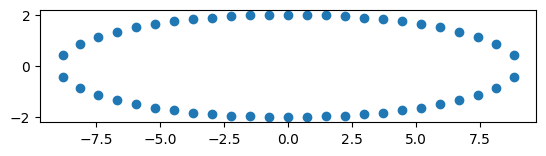

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

<font face='georgia'>
<i>
1. As a part of this notebook we will be working on the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. We can either implement your own SGDRegression(prefered) or
we can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that we will use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment we will train your linear regression on the data (X, Y) with different regularizations alpha = [0.0001, 1, 100] and 
observe how prediction hyper plane moves with respect to the outliers

5. In each iteration we will add single outlier and will observe the movement of the hyper plane.

6. Consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. For each regularizer, we will add these outliers one at time to data and then train your model 
again on the updated data. 

8. We will plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points
</i>
</font>

In [5]:
X.shape, Y.shape, type(X)

((50,), (50,), numpy.ndarray)

In [6]:
X = X.reshape(-1, 1)
X.shape, Y.shape

((50, 1), (50,))

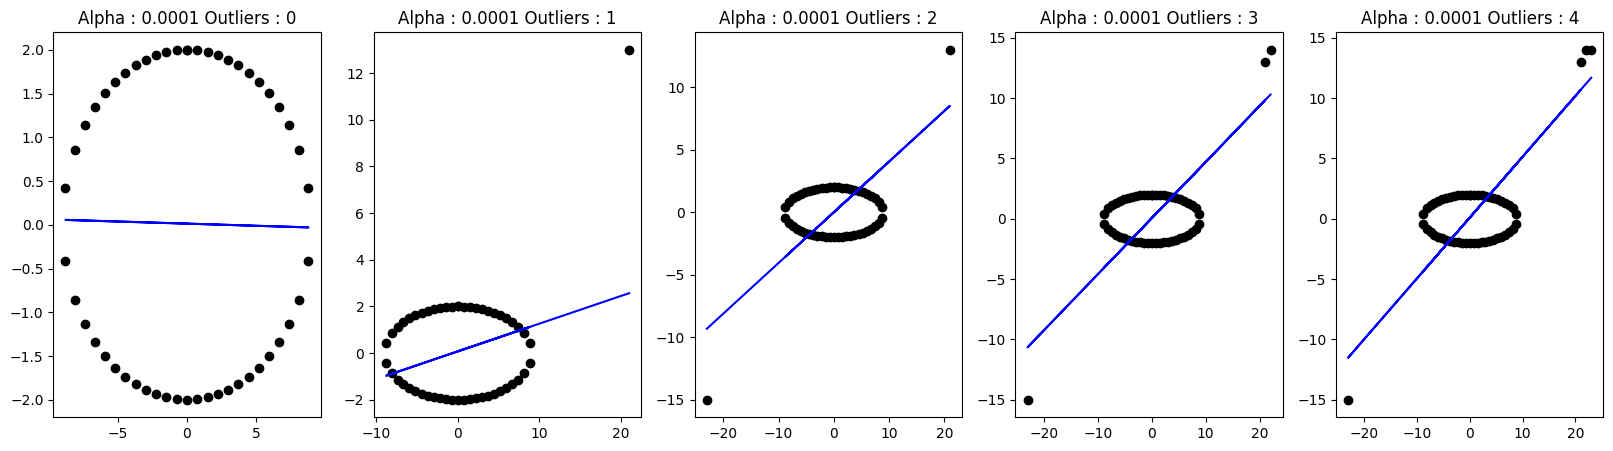

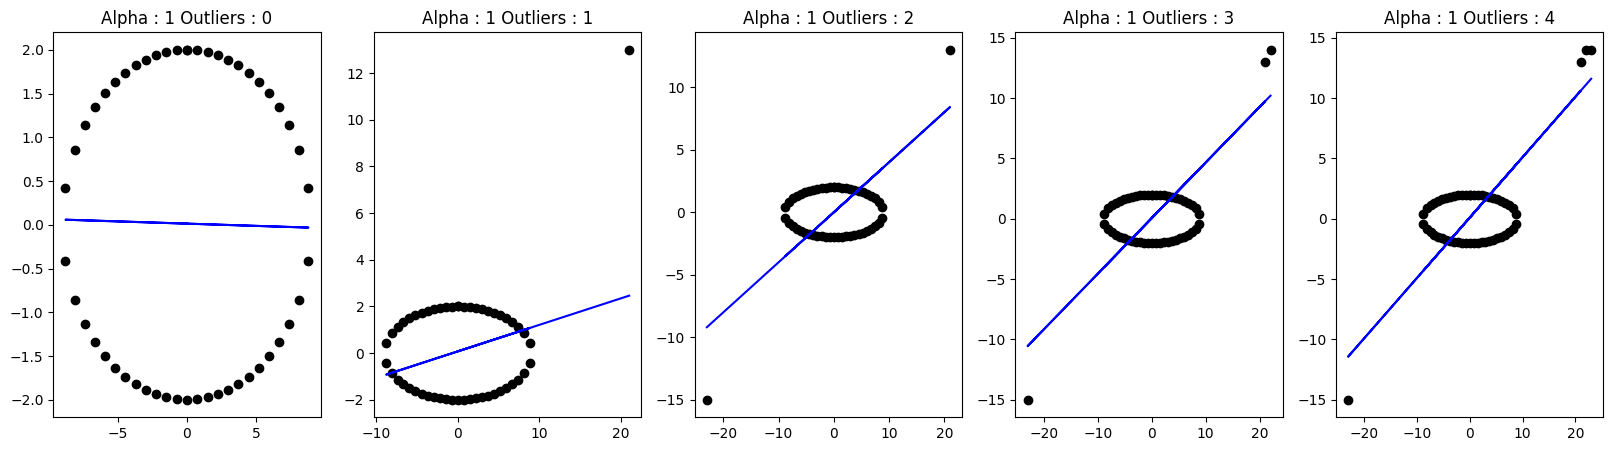

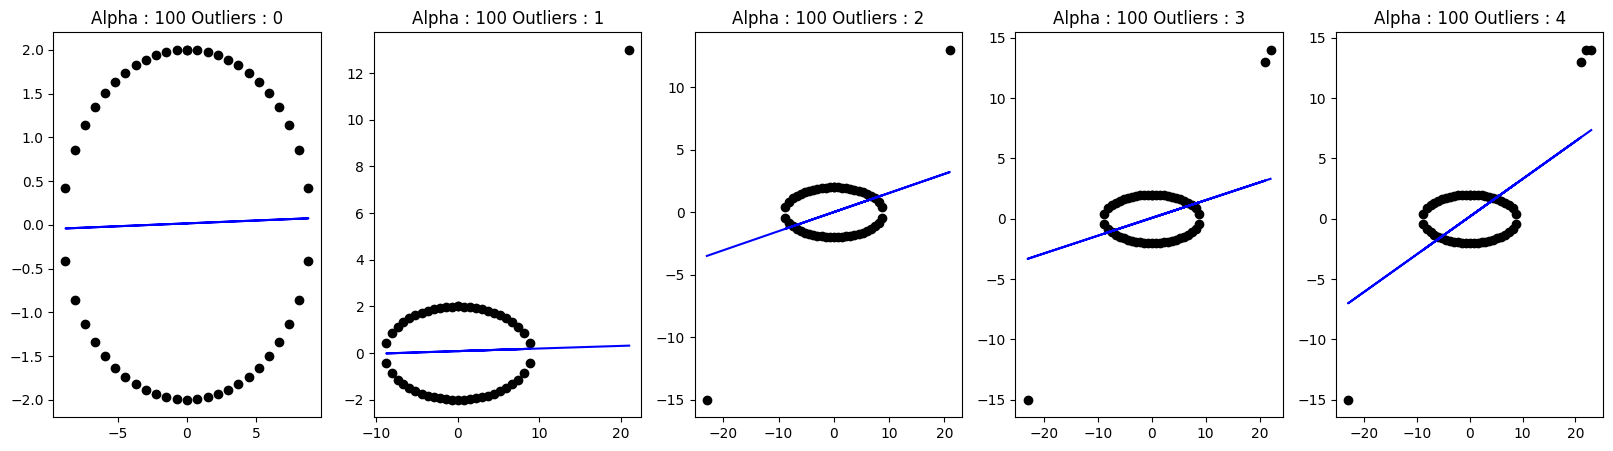

In [7]:
alphas = [0.0001, 1, 100]
outliers = [(0,2), (21,13), (-23,-15), (22,14), (23,14)]

#def draw_hyper_plane(coef,intercept,y_max,y_min):
#    #print(coef, intercept)
#    points=np.array([[((-coef*y_min - intercept)/coef), y_min],[((-coef*y_max - intercept)/coef), y_max]])
#    plt.plot(points[:,0], points[:,1], color='blue')

for alp in alphas:
    plt.figure(figsize = (20,5))
    
    X = b * np.sin(phi)
    Y = a * np.cos(phi)
    #print(X.shape, Y.shape)
    out = 0
    
    for x, j in enumerate(outliers):
        plt.subplot(1, 5, x+1)
        
        X = np.append(X,j[0]).reshape(-1,1)
        Y = np.append(Y,j[1])
        #print(X.shape, Y.shape)
        
        clf = SGDRegressor(alpha=alp, eta0=0.001, learning_rate='constant', random_state=0)
        clf.fit(X,Y)
        
        plt.scatter(X, Y, color='black')
        plt.plot(X, clf.coef_ * X + clf.intercept_, color='blue')
        title = "Alpha : "+str(alp)+" Outliers : "+str(out)
        plt.title(title)
        out += 1

    plt.show()

## Observation
1. As we add outliers lower regularization term won't help much to model to get affected by outliers.
2. As we increase regularization term, it helps model to get rid of outliers and move towards best fit.